# HW 04 Solutions

## Ch 7 Homework Solutions 

### 7.1, 7.3, 7.4, 7.8, 7.9


## Exercise 7.1: Fourier Transforms of Simple Functions

Write Python programs to calculate the
coefficients in the discrete Fourier transforms of the following periodic
functions sampled at $N=1000$ evenly spaced points, and make plots of their
amplitudes similar to the plot shown in Fig. 7.4:

A) A single cycle of a square-wave with amplitude 1

B) The sawtooth wave $y_n=n$

C) The modulated sine wave $y_n = \sin(\pi n/N) \sin(20\pi n/N)$

If you wish you can use the Fourier transform function from the file
dft.py as a starting point for your program.



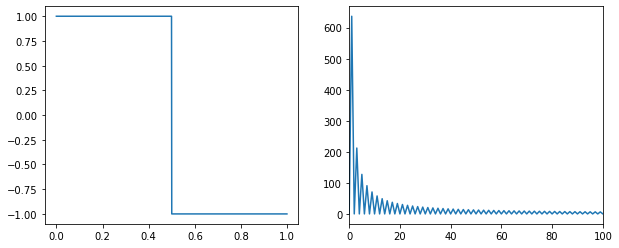

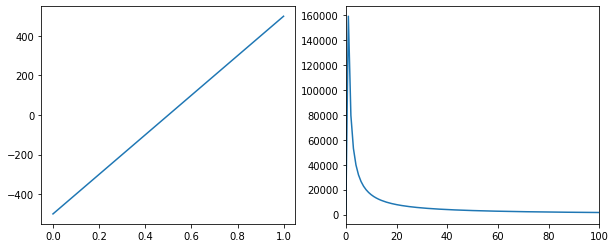

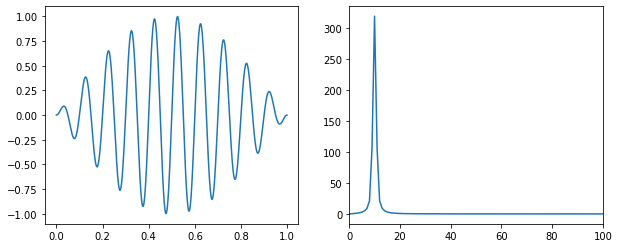

In [1]:
%matplotlib inline
# Solution of 7.1a: square wave

from numpy import arange, zeros, sin
import matplotlib.pyplot as plt
from cmath import exp,pi

def dft(y):
    N = len(y)
    c = zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

def f_square(x):
    if x<0.5:
        return 1
    else:
        return -1

def plotit(x,y,c,flag):
    # Plot time series and DFT side by side
    plt.figure(figsize = (10,4))
    ax1 = plt.subplot(121)
    ax1.plot(x,y)
    if flag==True:
        plt.ylim(-1.1,1.1)
    ax2 = plt.subplot(122)
    ax2.plot(abs(c))
    plt.xlim(0,100)


N = 1000
x = arange(0,1,1/N)
y = zeros(len(x))
for i in range(len(y)):
    y[i] = f_square(x[i])
c = dft(y)

plotit(x,y,c,True)

# Now do 7.1b - Sawtooth Wave

y = arange(N) - N/2
c = dft(y)

plotit(x,y,c,False)


# Now 7.1c - Modulated Sine Wave

y = sin(pi*x)*sin(20*pi*x)
c = dft(y)

plotit(x,y,c,True)



---
## Exercise 7.3: Fourier Transforms of Musical Instruments

In the on-line resources you will
find files called piano.txt trumpet.txt, which
contain data representing the waveform of a single note, played on,
respectively, a piano and a trumpet.

A) Write a program that loads a waveform from one of these files, plots
  it, then calculates its discrete Fourier transform and plots the
  magnitudes of the first $10\,000$ coefficients in a manner similar to
  Fig. 7.4.  Note that you will have to use a fast Fourier transform for
  the calculation because there are too many samples in the files to do the
  transforms the slow way in any reasonable amount of time.

  Apply your program to the piano and trumpet waveforms and discuss briefly
  what one can conclude about the sound of the piano and trumpet from the
  plots of Fourier coefficients.
  
B) Both waveforms were recorded at the industry-standard rate of
  $44\,100$ samples per second and both instruments were playing the same
  musical note when the recordings were made.  From your Fourier transform
  results calculate what note they were playing.  (Hint: The musical note
  middle~C has a frequency of $261\,$Hz.)

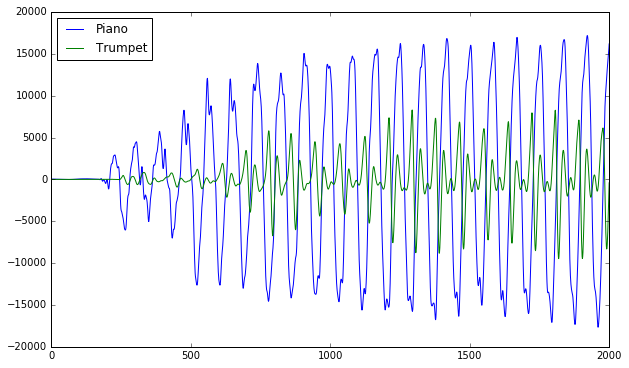

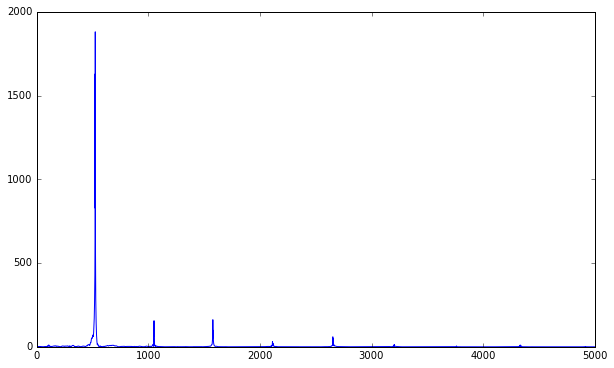

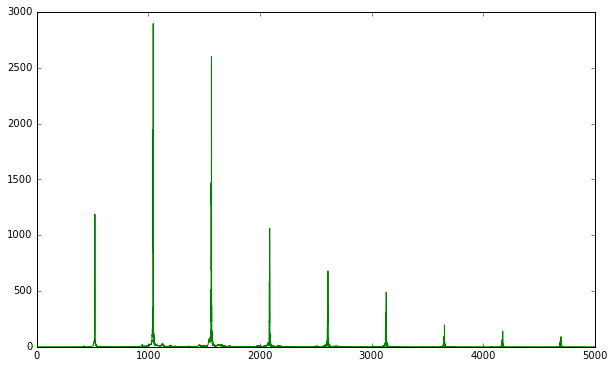

In [17]:
# Solution to 7.3

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, rfftfreq

p = np.loadtxt("piano.txt")
N = len(p)
t = np.loadtxt("trumpet.txt")

cp = rfft(p)
ct = rfft(t)
amp_p = abs(cp)*2/N
amp_t = abs(ct)*2/N
freqs = rfftfreq(N,1/44100.)

plt.figure(figsize=(10,6))
plt.plot(p[0:2000],label='Piano')
plt.plot(t[0:2000],label='Trumpet')
plt.legend(loc=2)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(freqs,amp_p)
plt.xlim(0,5000)
plt.show()
plt.figure(figsize=(10,6))
plt.plot(freqs,amp_t,'g')
plt.xlim(0,5000)
plt.show()

**Discussion: ** The piano contains most of the acoustic power in the fundamental mode, with only limited power in the harmonics.  This note will sound similar to a pure sine wave.

The trumpet contains most of the power in the 2nd and 3rd harmonics, while the fundamental does not have a large amplitude.  This is why the trumpet sounds 'brighter' than a piano, and this is why a trumpet can 'cut through' when in a mix of other instruments.  

The peak frequency is at about 522 Hz, which is one octave above middle C.

---
## Exercise 7.4: Fourier filtering and smoothing.

in the on-line resources you'll find a file called dow.txt. It contains the daily closings value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market. 

Write a program to do the following:

1. Read in the data from dow.txt and plot them on a graph.

2. Calculate the coefficients of the discrete Fourier transform of the data using the functino rfft from numpy.fft, which produces and array of $\frac{1}{2}N + 1$ complex numbers.

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%).

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function irfft, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. what is happening when you set the Fourier coefficinets to zero?

5. Modify your program so that is sets all but the first 2% of the coefficients to zero and run it again.


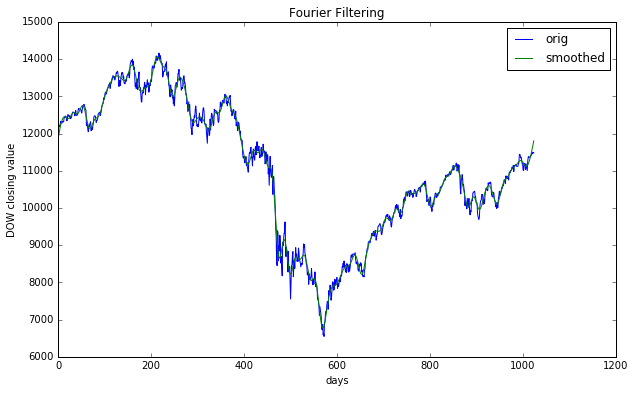

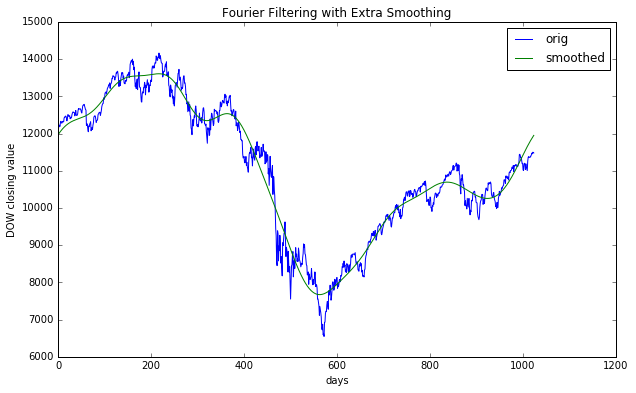

In [14]:
# Solution to 7.4 1-4
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft,irfft

y = np.loadtxt("dow.txt")

c = rfft(y)
Nc = len(c)
c[int(Nc/10.):] = 0
y_sm = irfft(c)

plt.figure(figsize=(10,6))
plt.plot(y,label='orig')
plt.plot(y_sm,label='smoothed')
plt.title('Fourier Filtering')
plt.xlabel('days')
plt.ylabel('DOW closing value')
plt.legend()
plt.show()

# Now smooth more dramatically

c[int(Nc/50.):] = 0
y_sm = irfft(c)

plt.figure(figsize=(10,6))
plt.plot(y,label='orig')
plt.plot(y_sm,label='smoothed')
plt.title('Fourier Filtering with Extra Smoothing')
plt.xlabel('days')
plt.ylabel('DOW closing value')
plt.legend()
plt.show()

**Discussion:** Setting the final 90% of the Fourier coefficients to zero smooths over some of the day-to-day variations in the time series, while keeping it's essential character.  The heavy smoothing given by setting 98% of the coefficients to zero results in a curve that could be useful to study the longer-term trends while ignoring the day-to-day or even week-to-week variations.

---
#### Problem 7.8: Diffraction Gratings


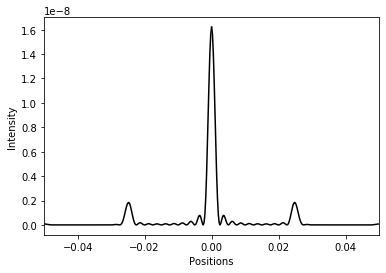

In [5]:
# Example program

from math import sin, sqrt, pi
from numpy import zeros, arange
from numpy.fft import rfft
from pylab import plot, show, xlim, xlabel,ylabel

# Constants
slits = 10
spacing = 20e-6
alpha = pi/spacing
w = slits*spacing
expand = 10
W = w*expand
lmbda = 500e-9
d = 0.1
f = 1.0
Ng = 500
N = Ng*expand

# funciton to return the transmission function of the grating
def q(z):
    return sin(alpha*z)**2

# create the grating array
y = zeros(N)
for n in range(Ng):
    z = n*w/Ng - w/2
    y[n] = sqrt(q(z))
    
# Calculate the diffraction pattern using an FFT
I = abs(W*rfft(y)/N)**2
    
# Make a plot
xpoints = arange(0,d/2,lmbda*f/W)
Nd = len(xpoints)
plot(xpoints,I[:Nd],"k")
plot(-xpoints,I[:Nd],"k")
xlim(-d/2,d/2)
xlabel("Positions")
ylabel("Intensity")
show()
    

---
###Exercise 7.9: Image Deconvolution

#### Part A
Write a program that reads in blur.txt and displays the image
#### Part B
Write a program that calculates the point spread function over the same area as the blur.txt array, and displays the resulting array as a density plot.
#### Part C
Combine the two programs above along with fourier techniques to deblur the image
#### Part D
Why can we not perfectly deblur any image?

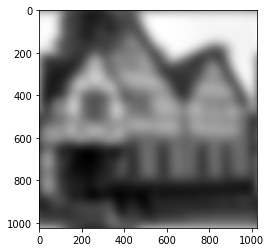

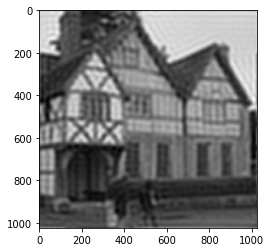

In [6]:
from math import exp
from numpy import empty, loadtxt
from numpy.fft import rfft2, irfft2
from pylab import imshow, show, gray

sigma = 25

x = loadtxt("blur.txt")
rows = x.shape[0]
cols = x.shape[1]

# Make the density plot
gray()
imshow(x)
show()

# compute the point spread function
f = empty([rows,cols])
for j in range(cols):
    jp = j
    if jp>cols/2:
        jp -= cols
    for i in range(rows):
        ip = i
        if ip>rows/2:
            ip -=rows
        f[i,j] = exp(-(ip*ip+jp*jp)/(2*sigma**2))

#fourier transform the picture and the point spread fuction
xfft = rfft2(x)
ffft = rfft2(f)

#divide one by the other
yfft = empty([rows,cols//2+1],complex)
for j in range(cols//2+1):
    for i in range(rows):
        yfft[i,j] = xfft[i,j]/max(ffft[i,j],1.e-2)

# invert the transform
y = irfft2(yfft)
        
imshow(y)
show()

This isn't perfect, but it is better.  The reason it's not perfect is because of the very small (or zero) terms in the Fourier transform of the point spread function.  When the picture is blurred, some Fourier coefficients get multiplied by small or zero numbers, which causes them to underflow and get set to zero.  Once they have been set to zero there is no way to recapture the data that they used to contain and all information about these Fourier components is lost - no amount of deconvolution will recover data that has been thrown away.